<a href="https://colab.research.google.com/github/ShubhamShaswat/NaiveBayes/blob/master/convolution_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from skimage import io,viewer

/usr/local/lib/python3.6/dist-packages/skimage/viewer/__init__.py:6: UserWarning: Viewer requires Qt
  warn('Viewer requires Qt')


In [3]:
img = io.imread('http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/image.jpg', as_grey=True)  # load the image as grayscale
img.shape

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


(897, 1168)

In [0]:
img[:5,:5]*255
viewer.ImageViewer(img).show()              # plot the image


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


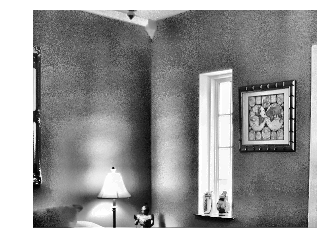

 First 5 columns and rows of the image_sharpen matrix: [[ 4.46000000e+02  2.49000000e+02  2.33000000e+02  2.20000000e+02
   2.33000000e+02]
 [ 2.84000000e+02  2.83106871e-14  3.30000000e+01  9.00000000e+00
   3.00000000e+00]
 [ 2.21000000e+02 -4.20000000e+01  9.00000000e+00  3.00000000e+00
  -2.10000000e+01]
 [ 2.63000000e+02  1.20000000e+01  1.50000000e+01  1.50000000e+01
  -2.10000000e+01]
 [ 2.56000000e+02  3.70000000e+01 -1.10000000e+01  1.20000000e+01
  -1.60000000e+01]]


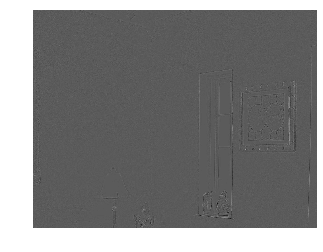

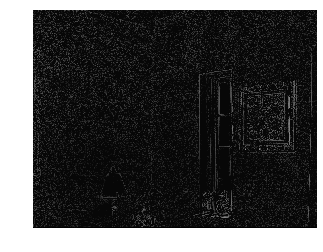

In [11]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab
def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output
img = io.imread('http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/image.jpg')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
# Adjust the contrast of the image by applying Histogram Equalization 
image_equalized = exposure.equalize_adapthist(img/np.max(np.abs(img)), clip_limit=0.03)
plt.imshow(image_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
# Convolve the sharpen kernel and the image
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
image_sharpen = convolve2d(img,kernel)
print (' First 5 columns and rows of the image_sharpen matrix:', image_sharpen[:5,:5]*255)
# Plot the filtered image
plt.imshow(image_sharpen, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
# Adjust the contrast of the filtered image by applying Histogram Equalization 
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()